In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Baca file dan bersihkan
df = pd.read_excel("Data KPM BANSOS.xlsx", skiprows=3)
df.columns = df.columns.str.strip()

# 2. Buang kolom non-fitur
df = df.drop(columns=['NO', 'NIK', 'NAMA', 'ALAMAT'])

# 3. Bersihkan kolom pendapatan
df['PENDAPATAN'] = df['PENDAPATAN'].astype(str)
df['PENDAPATAN'] = df['PENDAPATAN'].str.replace('Rp', '', regex=False)
df['PENDAPATAN'] = df['PENDAPATAN'].str.replace('.', '', regex=False)
df['PENDAPATAN'] = df['PENDAPATAN'].str.replace(',', '.', regex=False)
df['PENDAPATAN'] = df['PENDAPATAN'].astype(float)

# 4. Pisahkan fitur dan label
X = df[['PENDAPATAN']]
y = df['KATEGORI']

# 5. Encode label kategori ke angka
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("Mapping Label:", dict(zip(le.classes_, le.transform(le.classes_))))

# 6. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 7. Normalisasi
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. Latih model SVM RBF
model_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
model_rbf.fit(X_train_scaled, y_train)

# 9. Prediksi
y_pred_rbf = model_rbf.predict(X_test_scaled)

# 10. Evaluasi
target_names = [str(cls) for cls in le.classes_]

print("\n📊 Classification Report (SVM RBF):")
print(classification_report(y_test, y_pred_rbf, target_names=target_names, zero_division=0))
print("🧮 Confusion Matrix (SVM RBF):")
print(confusion_matrix(y_test, y_pred_rbf))
print(f"🔹 Akurasi SVM RBF: {accuracy_score(y_test, y_pred_rbf)*100:.2f}%")


Mapping Label: {'HAMPIR MISKIN': 0, 'MISKIN': 1, 'RENTAN MISKIN': 2, 'SANGAT MISKIN': 3}

📊 Classification Report (SVM RBF):
               precision    recall  f1-score   support

HAMPIR MISKIN       0.89      0.31      0.46        26
       MISKIN       0.36      0.87      0.51        23
RENTAN MISKIN       0.00      0.00      0.00        21
SANGAT MISKIN       0.42      0.50      0.45        30

     accuracy                           0.43       100
    macro avg       0.42      0.42      0.36       100
 weighted avg       0.44      0.43      0.37       100

🧮 Confusion Matrix (SVM RBF):
[[ 8  8  0 10]
 [ 0 20  0  3]
 [ 1 12  0  8]
 [ 0 15  0 15]]
🔹 Akurasi SVM RBF: 43.00%


In [2]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Inisialisasi semua model SVM dengan kernel berbeda
model_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
model_linear = SVC(kernel='linear', C=1.0)
model_sigmoid = SVC(kernel='sigmoid', C=1.0)
model_poly = SVC(kernel='poly', degree=3, C=1.0)

models = {
    'RBF': model_rbf,
    'Linear': model_linear,
    'Sigmoid': model_sigmoid,
    'Polynomial': model_poly
}

# Jalankan training dan evaluasi untuk setiap kernel
for name, model in models.items():
    print(f"\n🧪 Evaluasi SVM Kernel: {name}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Buat target_names dari label encoder
    target_names = le.classes_
    
    print(classification_report(y_test, y_pred, target_names=target_names, zero_division=0))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"🔹 Akurasi SVM ({name}): {accuracy_score(y_test, y_pred)*100:.2f}%")



🧪 Evaluasi SVM Kernel: RBF
               precision    recall  f1-score   support

HAMPIR MISKIN       0.89      0.31      0.46        26
       MISKIN       0.36      0.87      0.51        23
RENTAN MISKIN       0.00      0.00      0.00        21
SANGAT MISKIN       0.42      0.50      0.45        30

     accuracy                           0.43       100
    macro avg       0.42      0.42      0.36       100
 weighted avg       0.44      0.43      0.37       100

Confusion Matrix:
[[ 8  8  0 10]
 [ 0 20  0  3]
 [ 1 12  0  8]
 [ 0 15  0 15]]
🔹 Akurasi SVM (RBF): 43.00%

🧪 Evaluasi SVM Kernel: Linear
               precision    recall  f1-score   support

HAMPIR MISKIN       0.00      0.00      0.00        26
       MISKIN       0.32      0.87      0.47        23
RENTAN MISKIN       0.00      0.00      0.00        21
SANGAT MISKIN       0.29      0.37      0.32        30

     accuracy                           0.31       100
    macro avg       0.15      0.31      0.20       100
 wei

In [3]:
print(df['KATEGORI'].value_counts())


KATEGORI
SANGAT MISKIN    140
MISKIN           126
HAMPIR MISKIN    124
RENTAN MISKIN    107
Name: count, dtype: int64


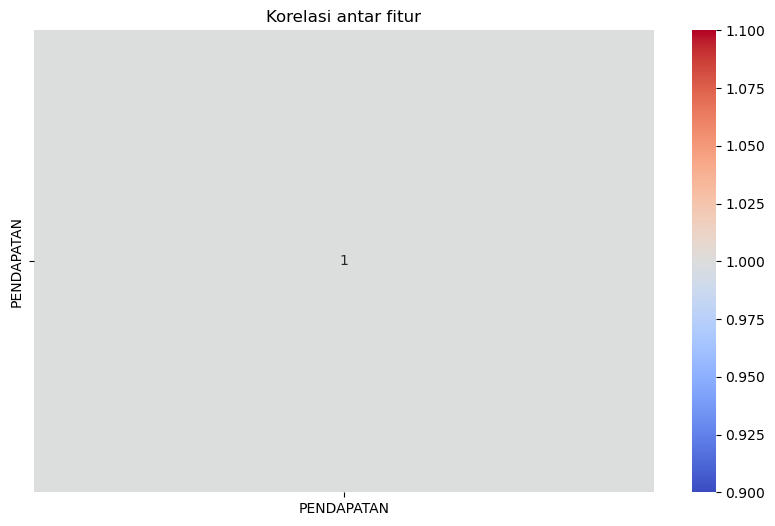

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Korelasi antar fitur")
plt.show()


In [5]:
print(df.columns)
df.dtypes


Index(['KATEGORI', 'PENDAPATAN'], dtype='object')


KATEGORI       object
PENDAPATAN    float64
dtype: object

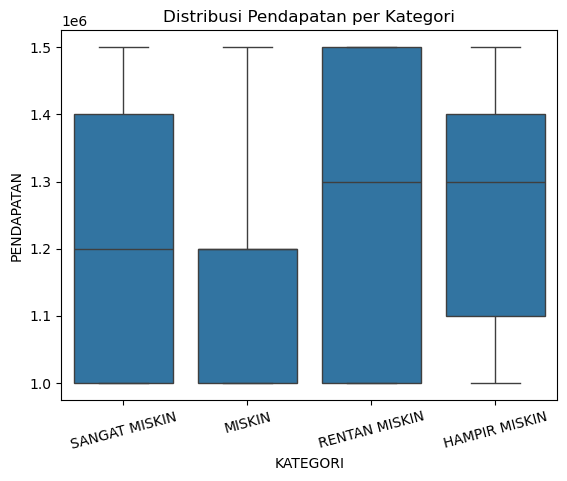

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='KATEGORI', y='PENDAPATAN')
plt.xticks(rotation=15)
plt.title("Distribusi Pendapatan per Kategori")
plt.show()


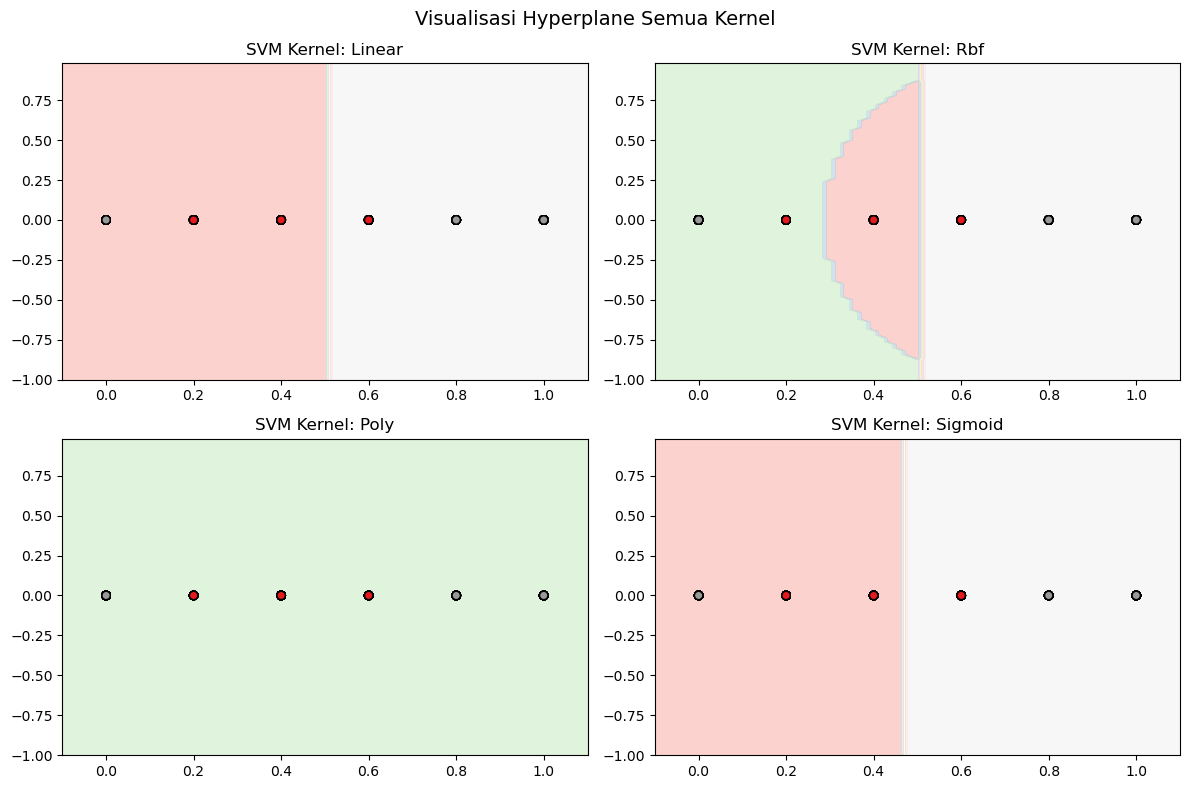

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Siapkan data (fitur dummy untuk visualisasi 2D)
X = df[['PENDAPATAN']].copy()
X['dummy'] = 0  # semua dummy = 0 agar tetap 1D aslinya
y = LabelEncoder().fit_transform(df['KATEGORI'])

# Normalisasi
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Definisi kernel dan model
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
models = [SVC(kernel=k, C=1, gamma='auto').fit(X_train, y_train) for k in kernels]

# Buat grid untuk visualisasi
h = .02
x_min, x_max = X_scaled[:, 0].min() - 0.1, X_scaled[:, 0].max() + 0.1
y_min, y_max = -1, 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]

# Plot semua model
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.ravel()

for i, model in enumerate(models):
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    axs[i].contourf(xx, yy, Z, alpha=0.6, cmap='Pastel1')
    axs[i].scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap='Set1')
    axs[i].set_title(f"SVM Kernel: {kernels[i].capitalize()}")
    axs[i].set_xlim(xx.min(), xx.max())
    axs[i].set_ylim(yy.min(), yy.max())

plt.suptitle("Visualisasi Hyperplane Semua Kernel", fontsize=14)
plt.tight_layout()
plt.show()
